<a href="https://colab.research.google.com/github/gomark/tf-load-pb-public-1/blob/master/tf_load_pb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/****
To test load .pb file and do inference
****/

In [0]:
!pip install pycocotools

In [0]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [0]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [0]:
%%bash 
cd models/research
pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1017522 sha256=406f613cf384d945faac3f7a3443aa52d1de3f6899fa9795820e68e4406efd93
  Stored in directory: /tmp/pip-ephem-wheel-cache-nutojoby/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [0]:
!pwd
!ls -l
!gsutil cp gs://puttitang-bucket-1/ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb /content/ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
!ls -l

/content
total 16
drwxr-xr-x 6 root root 4096 Apr 16 02:46 models
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data
drwxr-xr-x 3 root root 4096 Apr 16 02:57 ssd_mobilenet_v2_coco_2018_03_29
drwxr-xr-x 2 root root 4096 Apr 16 02:57 test_images
Copying gs://puttitang-bucket-1/ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb...

Operation completed over 1 objects/66.8 MiB.                                     
total 16
drwxr-xr-x 6 root root 4096 Apr 16 02:46 models
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data
drwxr-xr-x 3 root root 4096 Apr 16 02:57 ssd_mobilenet_v2_coco_2018_03_29
drwxr-xr-x 2 root root 4096 Apr 16 02:57 test_images


In [0]:
!gsutil cp gs://puttitang-bucket-1/test_images/image1.jpg /content/test_images/image1.jpg
!gsutil cp gs://puttitang-bucket-1/test_images/image2.jpg /content/test_images/image2.jpg

Copying gs://puttitang-bucket-1/test_images/image1.jpg...
- [1 files][126.8 KiB/126.8 KiB]                                                
Operation completed over 1 objects/126.8 KiB.                                    
Copying gs://puttitang-bucket-1/test_images/image2.jpg...
- [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      


In [0]:
!ls -l
!cat models/research/object_detection/data/mscoco_label_map.pbtxt

total 16
drwxr-xr-x 6 root root 4096 Apr 16 02:46 models
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data
drwxr-xr-x 3 root root 4096 Apr 16 02:57 ssd_mobilenet_v2_coco_2018_03_29
drwxr-xr-x 2 root root 4096 Apr 16 07:17 test_images
item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/04_sv"
  id: 4
  display_name: "motorcycle"
}
item {
  name: "/m/05czz6l"
  id: 5
  display_name: "airplane"
}
item {
  name: "/m/01bjv"
  id: 6
  display_name: "bus"
}
item {
  name: "/m/07jdr"
  id: 7
  display_name: "train"
}
item {
  name: "/m/07r04"
  id: 8
  display_name: "truck"
}
item {
  name: "/m/019jd"
  id: 9
  display_name: "boat"
}
item {
  name: "/m/015qff"
  id: 10
  display_name: "traffic light"
}
item {
  name: "/m/01pns0"
  id: 11
  display_name: "fire hydrant"
}
item {
  name: "/m/02pv19"
  id: 13
  display_name: "stop sign"
}
item {
  n

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from PIL import Image
import time

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0-rc2


In [0]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [0]:
imported = tf.saved_model.load('/content/ssd_mobilenet_v2_coco_2018_03_29/saved_model')
model = imported.signatures['serving_default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
print(model.inputs)

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


In [0]:
#PATH_TO_LABELS = 'models/research/object_detection/data/mscoco_label_map.pbtxt'
#category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [0]:
import json

f = open('models/research/object_detection/data/mscoco_label_map.pbtxt', 'r')
cat_index2 = {}
jsonstr = ''
ii = 0
for line in f:
  #print(line.strip())
  ll = line.strip();
  
  if (ll.startswith('item {')):
    jsonstr = '{'
  elif (ll.startswith('}')):
    jsonstr = jsonstr + ll
    ii = 0
    print(jsonstr)
    single_record = json.loads(jsonstr)
    cat_index2[single_record['id']] = single_record
  else:
    if (ii > 0):      
      jsonstr = jsonstr + ', '
      ii = ii + 1
    elif (ii == 0):
      ii = ii + 1

    ss = ll.split(":")
    #print('"' + ss[0] + '", ' + ss[1])

    jsonstr = jsonstr + '"' + ss[0] + '":' + ss[1]
    

f.close()

In [0]:
from object_detection.protos import string_int_label_map_pb2
from google.protobuf import text_format

with tf.io.gfile.GFile('models/research/object_detection/data/mscoco_label_map.pbtxt', 'r') as fid:
  label_map_string = fid.read()

  label_map = string_int_label_map_pb2.StringIntLabelMap()
  print(text_format.Merge(label_map_string, label_map))

  print("=====")

In [0]:
image_np = np.array(Image.open('/content/test_images/image2.jpg'))
image = np.asarray(image_np)
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis,...]

# Run inference
start = time.monotonic()
output_dict = model(input_tensor)
inference_time = time.monotonic() - start
print('%.1fms' % (inference_time * 1000))

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(output_dict.pop('num_detections'))
output_dict = {key:value[0, :num_detections].numpy() 
                for key,value in output_dict.items()}
output_dict['num_detections'] = num_detections

# detection_classes should be ints.
output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
  
# Handle models with masks:
if 'detection_masks' in output_dict:
  # Reframe the the bbox mask to the image size.
  detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            output_dict['detection_masks'], output_dict['detection_boxes'],
              image.shape[0], image.shape[1])      
  detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                      tf.uint8)
  output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
  

3624.0ms


[[0.08482438 0.4380611  0.17121425 0.49894646]
 [0.56564885 0.39131483 0.593569   0.40982482]
 [0.3835326  0.35030907 0.4055235  0.36863184]
 [0.5720238  0.05761471 0.62415105 0.07780795]
 [0.7710784  0.16185525 0.9451315  0.20130888]
 [0.56991774 0.03067033 0.62227803 0.0464198 ]
 [0.2751798  0.20607828 0.30678195 0.22383155]
 [0.68067646 0.08437312 0.8205919  0.11806779]
 [0.54608953 0.259283   0.5592742  0.26780993]
 [0.39218062 0.42660832 0.40826952 0.4437657 ]
 [0.44672766 0.79858243 0.47322235 0.8240831 ]
 [0.38648725 0.42394254 0.40607804 0.4398305 ]]
[38  1 38  1  1  1 38  1  1 38 38 38]


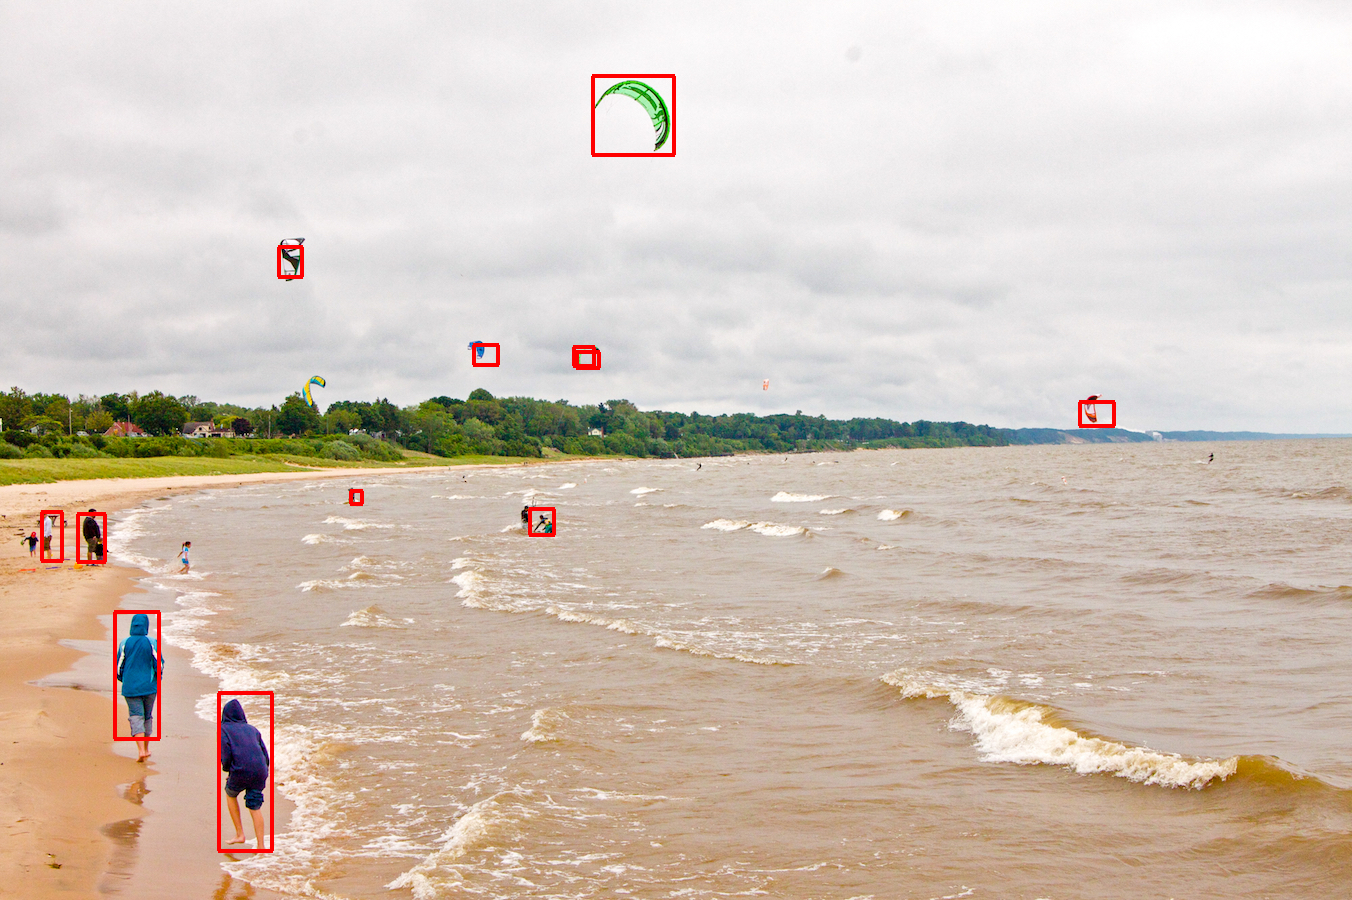

In [0]:
print(output_dict['detection_boxes'])
print(output_dict['detection_classes'])
#display(Image.fromarray(image_np))
img = Image.fromarray(image_np)
vis_util.draw_bounding_boxes_on_image(img, output_dict['detection_boxes'])
display(img)


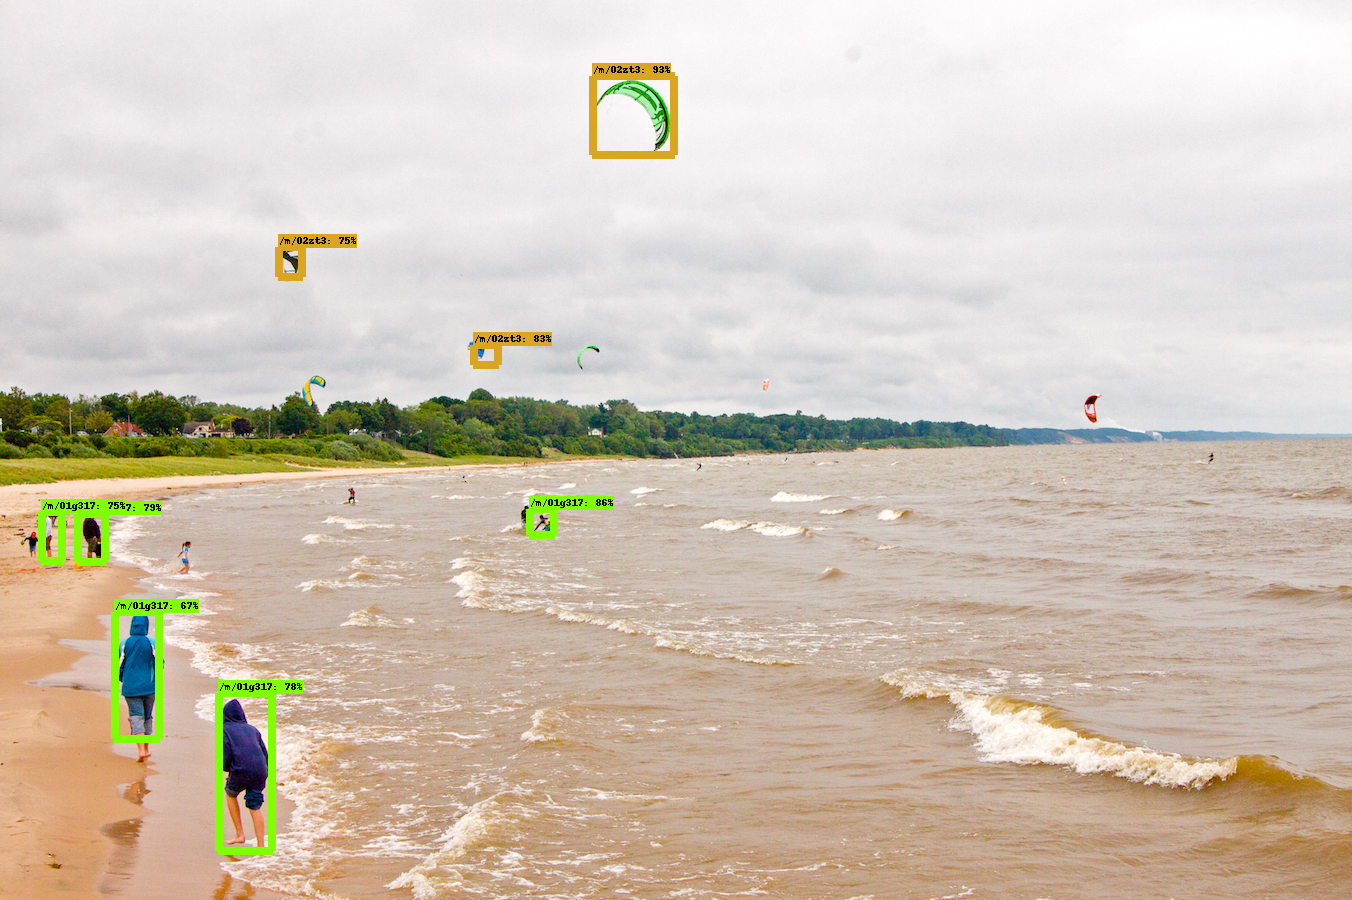

In [0]:
#cat_index = {"id":38, "display_name":"38"}
#cat_index = {38: {"id":38, "display_name":"x38", "name":"n38"}, 1: {"id":1, "display_name":"x1", "name":"n1"}}

#cat_index[38] = {"id":38, "display_name":"x38", "name":"n38"}
#cat_index[1] = {"id":1, "display_name":"x1", "name":"n1"}

vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index=cat_index2,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)

display(Image.fromarray(image_np))